# Aula 11 - Exercício 10
## Aprendizado não supervisionado: K-means
### Alunos:
- Alexandre Batistella Bellas, 9763168
- Moisés Botarro Ferraz Silva, 8504135
 

---
### RGB Color cube
Uma cor no sistema de cor *RGB* é definia pela tupla $(r, g, b)$, onde $r, g$ e $b$ correspondem às proporções de cada componente vermelho, verde e azul, respectivamente. Geralmente, $r, g$ e $b$ são definidos no intervalo inteiro entre $[0, 255]$.  Dessa forma, se desejarmos definir uma cor, $c_red$, totalmente vermelha, podemos defini-lá como $c_{red}=(255,0,0)$. 

Utilizando tal sistema de cores é possível definir $256 \cdot 256 \cdot 256 = 256^3 = 16777216$ cores diferentes. Uma visualização desse espaço de cores pode ser vista no [cubo RGB](https://3dwarehouse.sketchup.com/model/f28fa4312fc010f1c7ecd65c510d37b4/RGB-Color-Cube) (note que como não podemos ver o interior do cubo, na verdade só vemos uma quantidade bem reduzida do total de cores). 

Para as questões 1 à x, vamos considerar uma "fatia" desse cubo. Essa fatia corresponde à fixar um valor em um dos eixos e calcular todas as combinações possíveis dos valores nos outros eixos. Por exemplo, se fixarmos azul como $0$, verificamos que existem $256 \cdot 256 = 65536$ cores diferentes sem a presença de azul (ou seja, cores da forma $(r, g, 0)$).



---
### Questão 01.
Construa uma matriz de dimensão $(65536 \times 3)$ que representa todas as combinações possíveis de cores para o valor de azul igual a $255$. 

Note que uma linha dessa matriz deve corresponder a uma cor valida. Por exemplo, as três primeiras linhas dessa matriz podem ser:

```
[  0.   0. 255.]
[  0.   1. 255.]
[  0.   2. 255.]
```



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Buil list of colors 
colors = []
for i in range(256):
    for j in range(256):
        colors.append([i, j, 255])

        
def print_colors(colors):
    for color in colors:
        print(color)
        
colors = np.array(colors)
colors

array([[  0,   0, 255],
       [  0,   1, 255],
       [  0,   2, 255],
       ...,
       [255, 253, 255],
       [255, 254, 255],
       [255, 255, 255]])

---
### Questão 02.
Verifique que os valores calculados na questão anterior estão corretos. Para isso, faça um scatter plot com os eixos **x** e **y** correspondendo aos possíveis valores de **r** e **g** e pinte cada ponto com sua determinada cor. 

Lembre-se que a função scatter do matplotlib recebe a cor de cada ponto pelo parâmetro `c`,  e que os valores devem pertencer ao intervalo $[0,1]$.

```
X: primeira coluna
Y: segunda coluna
cor: matriz (lembre de dividir por 255)
```


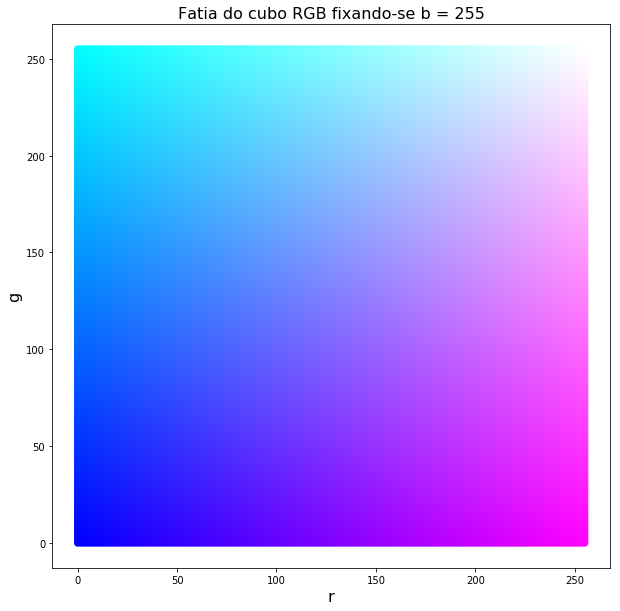

In [3]:
X = np.array([color[0] for color in colors]) # red
Y = np.array([color[1] for color in colors]) # green
c =  colors / 255 # keep colors between 0 and 1

plt.figure(figsize=(10,10))
plt.title("Fatia do cubo RGB fixando-se b = 255", fontsize=16)
plt.xlabel("r", fontsize=16)
plt.ylabel("g", fontsize=16)
plt.scatter(X, Y, c=c)
plt.show(True)

---
### Questão 03.
Utilize o algoritmo K-means com 4 clusters no conjunto de cores. Considere que o algoritmo deve encontrar clusters no espaço representados pelos eixos **x** e **y** da questão anterior, ou seja, pelo espaço bi-dimensional formado pela tupla $(r, g)$ para $r, g \in [0, 255]$. 

Plote o mesmo gráfico gerado na questão anterior, só que agora plote também os centróides encontrados pelo K-means. Utilize como opção de plot `'go'`, para protar pontos verdes nos centróides

In [4]:
from sklearn.cluster import KMeans

# Data pre-processing and training model
data = np.column_stack((X, Y))

model = KMeans(n_clusters=4, random_state=0)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [5]:
# Cluster's centroid
model.cluster_centers_

array([[ 63.5, 191.5],
       [191.5, 191.5],
       [191.5,  63.5],
       [ 63.5,  63.5]])

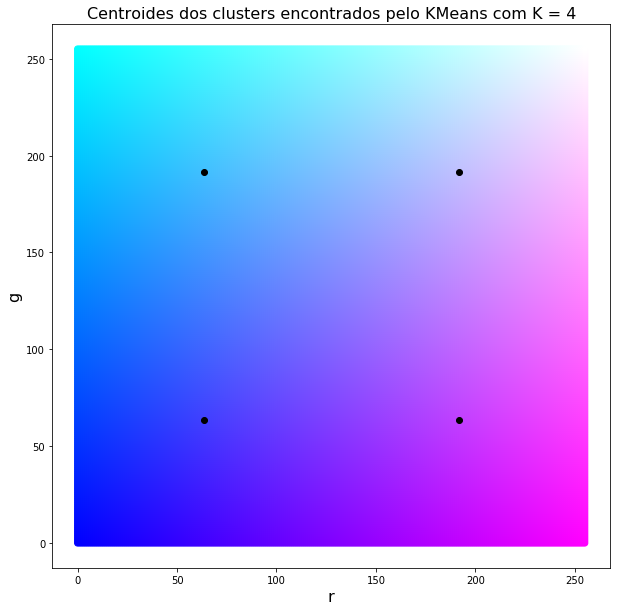

In [6]:
# Plot
plt.figure(figsize=(10,10))
plt.title("Centroides dos clusters encontrados pelo KMeans com K = 4", fontsize=16)
plt.xlabel("r", fontsize=16)
plt.ylabel("g", fontsize=16)
plt.scatter(X, Y, c=c)

# Plot clusters' centroid
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'ko')
plt.show(True)

---
### Questão 04.
Represente o espaço de cores da questão 1, só que agora utilize como valor de cor dos pontos os centróides achados na questão 3. Para isso, você deve:
- Achar a representação ponto -> cluster para cada ponto
- Converter cada ponto para cordenada $(r, g)$ do seu respectivo cluster
- Adicionar mais uma coluna, com valor $255$ às cordenadas achadas anteriormente (corresponde ao valor do azul)
- Utilizar esse novo valor como cor dos pontos

In [7]:
c_centroids = [] 

for color in data:
    cluster = model.predict([color])[0]
    centroid_color = model.cluster_centers_[cluster]
    centroid_color = np.append(centroid_color, 255)
    c_centroids.append(centroid_color / 255)    

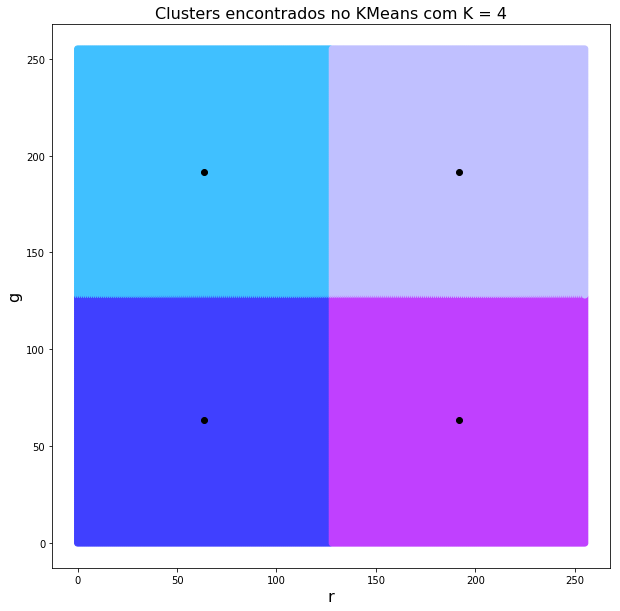

In [8]:
# Plot
plt.figure(figsize=(10,10))
plt.title("Clusters encontrados no KMeans com K = 4", fontsize=16)
plt.xlabel("r", fontsize=16)
plt.ylabel("g", fontsize=16)
plt.scatter(X, Y, c=c_centroids)

# Plot clusters' centroid
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'ko')
plt.show(True)



---

### Questão 05.
Repita o processo da questão anterior,  só que ao invés de utilizar os centróides achados na questão 3, ache novos centróides para `n_clusters=5`, `n_clusters=6` e `n_clusters=20`. Se preferir, utilize uma célula de código para cada plot.

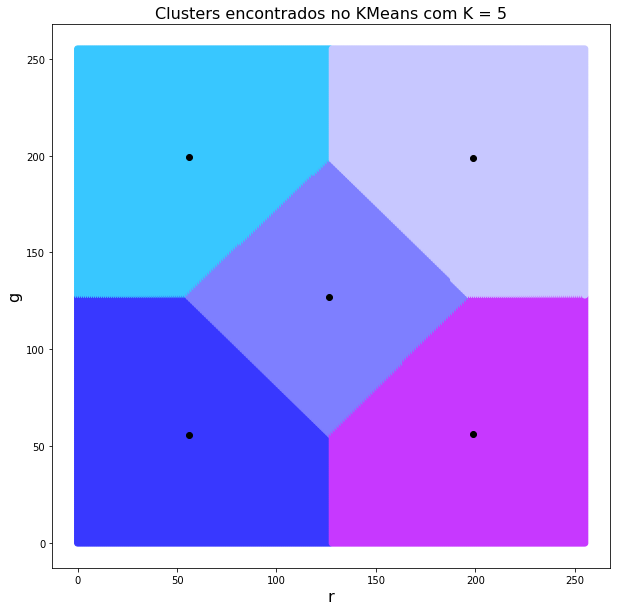

In [9]:
def find_clusters(data, n_clusters):
    # Find the clusters with KMeans
    model = KMeans(n_clusters=n_clusters, random_state=0)
    model.fit(data)
    
    # Find the centroid's color and associate it with each data point
    c_centroids = [] 
    for color in data:
        cluster = model.predict([color])[0]
        centroid_color = model.cluster_centers_[cluster]
        centroid_color = np.append(centroid_color, 255)
        c_centroids.append(centroid_color / 255)
    
    # Plot
    plt.figure(figsize=(10,10))
    plt.title("Clusters encontrados no KMeans com K = %d" % n_clusters, fontsize=16)
    plt.xlabel("r", fontsize=16)
    plt.ylabel("g", fontsize=16)
    plt.scatter(data[:,0], data[:,1], c=c_centroids)

    # Plot clusters' centroid
    plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'ko')
    plt.show(True)
    
find_clusters(data, 5)

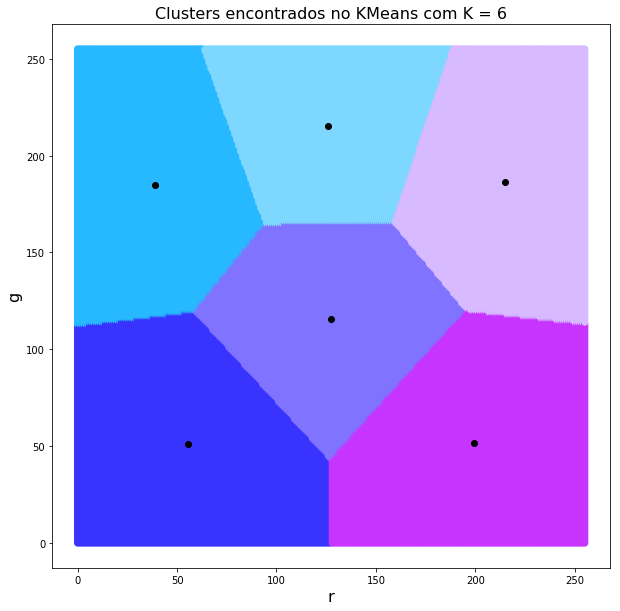

In [10]:
find_clusters(data, 6)

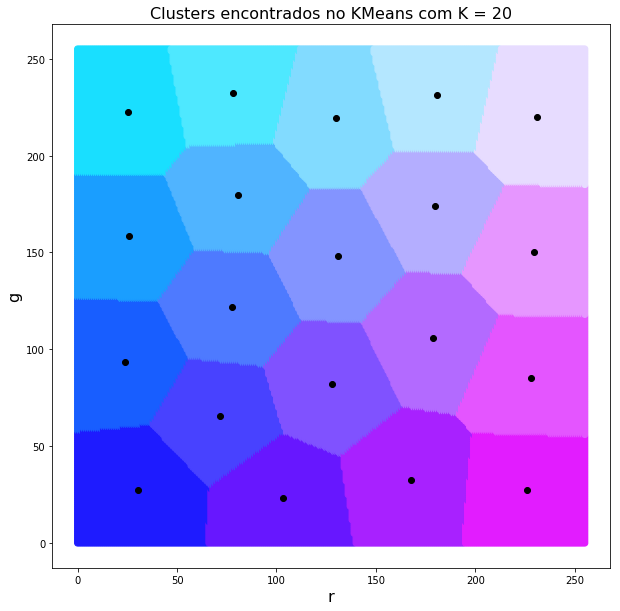

In [11]:
find_clusters(data, 20)